In [1]:
!pip3 install geopandas

     |████████████████████████████████| 1.1 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 8.5 MB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 18.6 MB 74 kB/s eta 0:00:013
     |████████████████████████████████| 1.4 MB 10.9 MB/s eta 0:00:01


In [26]:
!pip3 install shapely

In [28]:
import geopandas as gpd
from shapely.geometry import Polygon

In [51]:
gdf = gpd.read_file("grad-challenge.geojson")

In [68]:
polygons_gdf = gdf[gdf['geometry'].geom_type == 'Polygon']

In [73]:
specified_polygon = polygons_gdf['geometry'][2]

In [75]:
specified_polygon_coor = list(specified_polygon.exterior.coords)

In [77]:
polygon_final = Polygon(specified_polygon_coor)

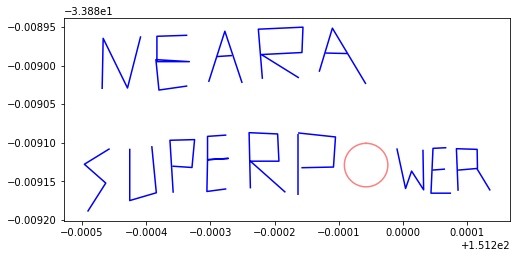

In [96]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Iterate through each feature in the GeoDataFrame
for index, feature in gdf.iterrows():
    geometry = feature['geometry']
    
    # Check if the feature's geometry is a Polygon and not the specified Polygon
    if not (geometry.geom_type == 'Polygon' and geometry.equals(specified_polygon)):
         gdf.iloc[[index]].plot(ax=ax, color='blue')
        # Plot the feature
   

# Plot the specified Polygon separately in a different color
x, y = specified_polygon.exterior.xy
ax.plot(x, y, color='red', alpha=0.5)
plt.show()